In [1]:
%pylab notebook
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation/')
import hts_misc as misc
import hts_fitting as hts
import hts_dosecalculations as dose
import os

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


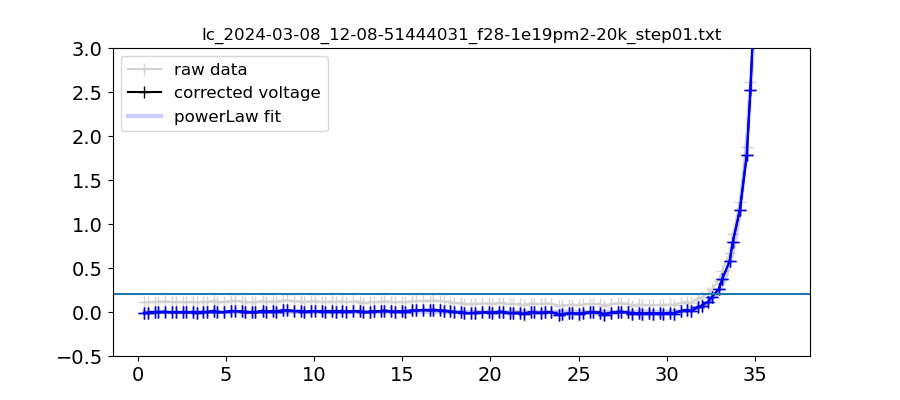

IntText(value=1, description='IV#:')

/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:93: RuntimeWarning: invalid value encountered in log
  current, voltage = np.log(current), np.log(voltage)
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitfunctions.py:31: RuntimeWarning: invalid value encountered in power
  return 2e-7*(i/ic)**n
/Users/alexisdevitre/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<IPython.core.display.Javascript object>


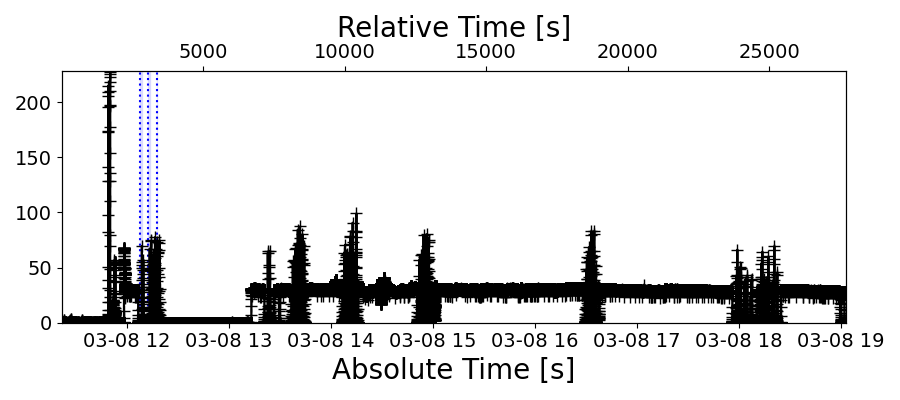

2024-03-08 11:21:49 2024-03-08 19:02:49


/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_7205/3710229653.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


In [2]:
parentDirectory = '/Users/alexisdevitre/Documents/GitHub/2024-CryoHTS-Facility/data/figure08/Ic/ffj28-020KIrradiation/'
fpaths = [parentDirectory+f for f in np.sort(os.listdir(parentDirectory)) if (f[:2] == 'Ic') & ('1e19' in f)]
hts.showcaseIVs(fpaths, style='powerLaw')

fig, axrt, axat = dose.plotBeamCurrentWithMeasurements(fpaths, '../../../Fluence data/Proton_2024_03_08-f28.xlsx', sname='1200keV')
fig.set_size_inches(9, 4)
fig.tight_layout()

In [3]:
# The offset is constant throughout so we can compute
# one value and subtract it from the integral
data = dose.loadBeamCurrent('../../../Fluence data/Proton_2024_03_08-f28.xlsx', sname='1200keV')
offset = data[(4000 <= data.time_s) & (data.time_s <= 6000)].ibeam_nA.mean()
offset

0.07772303462067243

In [92]:
f28_fluence_steps = []

intervals = [
    (1632, 2700),   # 1e19
    (6694, 7158),   # 2e19
    (7484, 8107),   # 3e19
    (8582, 9915),   # 6e19  3x 30x52s
    (10470, 12552), # 10e19 5x 30x52
    (12998, 18480), # 20e19 3x 30x52
    (18881, 23695), # 30e19 3x 30x52
    (25407, 27654), # 4x 30x52
]
data = dose.loadBeamCurrent('../../../Fluence data/Proton_2024_03_08-f28.xlsx', sname='1200keV')
for interval in intervals:
    d = data[(interval[0] <= data.time_s)&(data.time_s <= interval[1])]
    f28_fluence_steps.append(dose.compute_fluence(d.time_s, d.ibeam_nA-offset))
    
intervals = [
    (19, 2930),    # 40e19 (combine with previous step)
    (3645, 8600),  # 50e19 5x 30x52
    (9937, 15336), # 60e19 5x 30x52
]
data = dose.loadBeamCurrent('../../../Fluence data/Proton_2024_03_08-f28.xlsx', sname='1200keV-2')
for interval in intervals:
    d = data[(interval[0] <= data.time_s)&(data.time_s <= interval[1])]
    f28_fluence_steps.append(dose.compute_fluence(d.time_s, d.ibeam_nA-offset))

f28_fluence_steps

[1.3617535017304226e+19,
 1.0760046146715488e+19,
 1.394289221209709e+19,
 3.167103106080722e+19,
 4.8198240032001606e+19,
 1.2977334674440343e+20,
 1.1069166328483987e+20,
 5.062406253371519e+19,
 6.721270544192109e+19,
 1.1284079736774612e+20,
 1.2362312884269236e+20]

In [93]:
# Include the zero fluence point
# Join the beggining and end of step 7, which came from different excel sheets
f28_fluence_steps = [0.00]+f28_fluence_steps[:7]+[f28_fluence_steps[7]+f28_fluence_steps[8]]+f28_fluence_steps[9:]
f28_fluence_steps

[0.0,
 1.3617535017304226e+19,
 1.0760046146715488e+19,
 1.394289221209709e+19,
 3.167103106080722e+19,
 4.8198240032001606e+19,
 1.2977334674440343e+20,
 1.1069166328483987e+20,
 1.1783676797563627e+20,
 1.1284079736774612e+20,
 1.2362312884269236e+20]

In [97]:
# Correct for the beam-on events
d = data[(2634 <= data.time_s)&(data.time_s <= 2652)]
correction = dose.compute_fluence(d.time_s, d.ibeam_nA-offset)
f28_fluence = np.cumsum(f28_fluence_steps + np.array([0, 0, 0, 0, 3, 5, 3, 3, 4, 5, 5])*correction)


In [98]:
# Then turn fluence steps into cumulated fluences
f28_fluence

array([0.00000000e+00, 1.36175350e+19, 2.43775812e+19, 3.83204734e+19,
       7.12497291e+19, 1.21545010e+20, 2.52576582e+20, 3.64526470e+20,
       4.84040871e+20, 5.98978709e+20, 7.24698879e+20])

In [3]:
fnames = [
    'Ic_2024-03-12_22-42-08944236_f28-6e20pm2-1200keV-0nA-20k.txt',
    'Ic_2024-03-13_05-47-05799775_f28-anneal60k-60k.txt',
    'Ic_2024-03-13_05-46-35723597_f28-anneal60k-60k.txt',
    'Ic_2024-03-13_05-46-05811817_f28-anneal60k-60k.txt',
    'Ic_2024-03-13_04-31-24207229_f28-anneal50k-20k.txt',
    'Ic_2024-03-13_04-31-07997204_f28-anneal50k-20k.txt',
    'Ic_2024-03-13_04-30-51781617_f28-anneal50k-20k.txt',
    'Ic_2024-03-13_04-02-04008738_f28-anneal50k-50k.txt',
    'Ic_2024-03-13_04-00-55794358_f28-anneal50k-50k.txt',
    'Ic_2024-03-13_03-59-47722728_f28-anneal50k-50k.txt',
    'Ic_2024-03-13_02-46-56215046_f28-anneal40k-20k.txt',
    'Ic_2024-03-13_02-46-40000918_f28-anneal40k-20k.txt',
    'Ic_2024-03-13_02-46-24195049_f28-anneal40k-20k.txt',
    'Ic_2024-03-13_02-23-46197246_f28-anneal40k-40k.txt',
    'Ic_2024-03-13_02-22-47392582_f28-anneal40k-40k.txt',
    'Ic_2024-03-13_02-21-48790493_f28-anneal40k-40k.txt',
    'Ic_2024-03-13_01-11-44812395_f28-anneal30k-20k.txt',
    'Ic_2024-03-13_01-11-29011733_f28-anneal30k-20k.txt',
    'Ic_2024-03-13_01-11-13226921_f28-anneal30k-20k.txt',
    'Ic_2024-03-13_00-52-48728909_f28-anneal30k-30k.txt',
    'Ic_2024-03-13_00-52-23021699_f28-anneal30k-30k.txt',
    'Ic_2024-03-13_00-51-57217112_f28-anneal30k-30k.txt',
    'Ic_2024-03-12_22-49-11436665_f28-6e20pm2-1200keV-0nA-20k.txt'
]

<IPython.core.display.Javascript object>


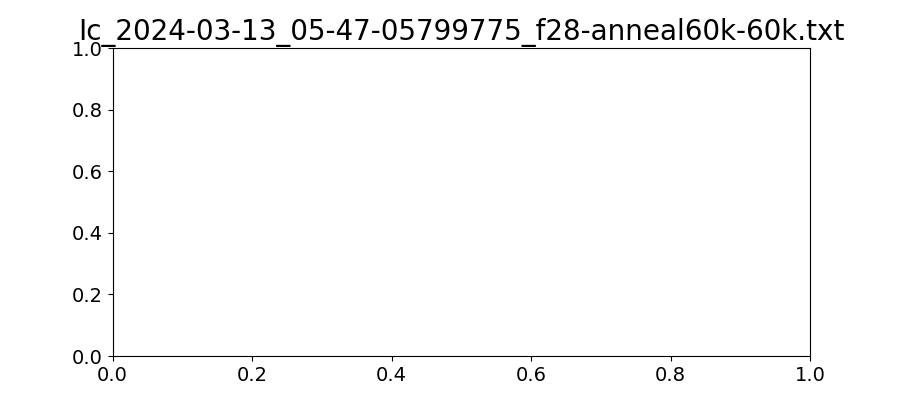

IntText(value=1, description='IV#:')

/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:58: RuntimeWarning: invalid value encountered in log
  current, voltage = np.log(current), np.log(voltage)


readIV raised:  not enough values to unpack (expected 4, got 0)
cannot access local variable 'current' where it is not associated with a value


/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:36: UserWarning: genfromtxt: Empty input file: "Ic/Ic_2024-03-13_05-47-05799775_f28-anneal60k-60k.txt"
  current, voltage, tHTS, tTAR = np.genfromtxt(fpath, usecols=[2, 3, 4, 5], unpack=True)
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:165: RuntimeWarning: overflow encountered in power
  return 2e-7*(i/ic)**n
/Users/alexisdevitre/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:526: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


list index out of range
readIV raised:  not enough values to unpack (expected 4, got 0)
cannot access local variable 'current' where it is not associated with a value


In [6]:
path = 'Ic/'
fpaths = [path+f for f in fnames]
hts.showcaseIVs(fpaths, style='powerLaw', vMax=5e-6)